In [29]:
import numpy as np
#helburu funtzioen sorrera
def f1(X):
    return X[0]
def f2(X):
    return X[1]
def constraints(x):
    x1, x2 = x[0], x[1]
    calc1 = x1 **2 + x2** 2 -1 -0.1 * np.cos(16*np.arctan(x1/x2))
    calc2 = (x1 - 0.5)**2 + (x2 - 0.5)**2
    calc3 = x1 >= 0 and x1 <= np.pi and x2 >= 0 and x2 <= np.pi

    if calc1 >= 0 and calc2 <= 0.5 and calc3 :
        return(True, [x1, x2])
    else:
        return(False, [10, 10])    
    
    

In [30]:
import random
def hasieraketa(pop):
    populazioa = []
    for i in range(pop):
        lag = [np.random.uniform(0, np.pi), np.random.uniform(0, np.pi)]
        while not constraints(lag)[0]:
            lag = [np.random.uniform(0, np.pi), np.random.uniform(0, np.pi)]
        populazioa.append(lag)
    return populazioa

def birkonbinaketa(x1, x2):
    #x = [x1[0]*0.5 + x2[0]*0.5,x1[1] * 0.5 + 0.5*x2[1]]
    x = [min(x1[0], x2[0]), min(x1[1], x2[1])]
    return x
def NSGA2(pop):
    fs= []
    suma = 0
    while pop:
        f = []
        suma = 0
        for i in pop:
            dom = True
            for j in pop:
                suma += 1
                if dominates(j, i):
                    dom = False
                    suma +=1
                    break
            if dom:
                f.append(i)
        for i in f:
            pop.remove(i)
        fs.append(f)
    return fs
def dominates(X, Y):
    if (X[0] < Y[0] and X[1]<=Y[1]) or (X[0] <= Y[0] and X[1]<Y[1]): return True
    return False


            
def tournament_selection(pop):
    idx1 = random.randint(0, len(pop)-1)
    idx2 = random.randint(0, len(pop)-1)
    if idx1 < idx2:
        return pop[idx1]
    else:
        return pop[idx2]


In [31]:
def genetikoa():
    n = 1000
    pop = hasieraketa(n)
    for i in range(100):
        F = NSGA2(pop)
        #Hartu onenak
        f_num = 0
        print(len(F[0]))
        pop_berria = F[f_num]
        f_num += 1
        while len(pop_berria) < n/2:
            for i in F[f_num]:
                pop_berria.append(i)
            f_num += 1
        lag = pop_berria.copy()
        #onenetatik berria sortu
        while len(pop_berria) < n:
            a= tournament_selection(lag)
            b = tournament_selection(lag)
            berria = birkonbinaketa(a, b)
            pop_berria.append(cosntraints(berria)[1])
            
        #print(pop_berria)
        pop_berria = [mutazioa(i) for i in pop_berria]
        pop = pop_berria
        suma = 0
        for i in pop:
            suma += i[0] + i[1]
        print(suma)
    F = NSGA2(pop)
    res = F[0]
    return res

genetikoa()

42


NameError: name 'cosntraints' is not defined

In [284]:
pop = hasieraketa(5000)
values1  = [i[0] for i in pop]
values2 = [i[1] for i in pop]
a = NSGA(values1, values2)
print(len(a[0]))

12


In [415]:
pop = hasieraketa(5000)
def NSGA2(pop):
    fs= []
    suma = 0
    while pop:
        f = []
        suma = 0
        for i in pop:
            dom = True
            for j in pop:
                suma += 1
                if dominates(j, i):
                    dom = False
                    suma +=1
                    break
            if dom:
                f.append(i)
        for i in f:
            pop.remove(i)
        fs.append(f)
    print(suma)
    return fs

d = NSGA2(pop)
print(len(d))

1
72


75


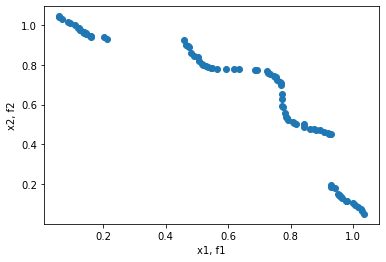

In [414]:
import numpy as np
from matplotlib import pyplot as plt
plt.scatter(*zip(*d[0]))
plt.xlabel('x1, f1')
plt.ylabel('x2, f2')
plt.show()